In [1]:
import pandas as pd
import os
import sys
import seaborn as sns


import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities.constants import PRETTY_NAMES

In [2]:
import json

models = [
    'basic_model',
    'last_hidden_state_model',
    'token_statistics_model',
    'full_dec_model',
    'full_dec_no_stat_model',
    'comet_model',
    'full_dec_comet_model'
]
# Load all the results



def load_timings_models():
   
    results = {}
    models = [
        'basic_model',
        'last_hidden_state_model',
        'token_statistics_model',
        'full_dec_model',
        'full_dec_no_stat_model',
        'comet_model',
        'full_dec_comet_model'
    ]
    for model in models:
        base = '../results/{}/'.format(model)
        summary_ref = base + '/timing_result.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[model] = summary["mean_time"]
    return results

timing_models = load_timings_models()


In [3]:
timing_models

{'basic_model': 0.0014542001058545232,
 'last_hidden_state_model': 0.016235920916361193,
 'token_statistics_model': 0.008109933413398124,
 'full_dec_model': 0.017101969971011426,
 'full_dec_no_stat_model': 0.02382522225874862,
 'comet_model': 0.051896765857002855,
 'full_dec_comet_model': 0.0755451023826103}

In [4]:

def load_timings_mc_estimate():
    results = {}
    for util in ['unigram-f1', 'chrf', 'COMET']:
        base = '../results/{}/'.format(util)
        summary_ref = base + 'm_estimation_timing_.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[util] = summary
    return results

timings_mc_estimate = load_timings_mc_estimate()


In [5]:
timings_mc_estimate

{'unigram-f1': {'1': 0.00012525243835702617,
  '2': 0.00016236879341892017,
  '3': 0.00019727279827794705,
  '4': 0.00021747370819421213,
  '5': 0.0002507803151721675,
  '10': 0.0003997535874498474,
  '25': 0.0007949910136163977,
  '100': 0.002480404349928116,
  '1000': 0.02409361328010971},
 'chrf': {'1': 0.0001261947625500985,
  '2': 0.0002371298121904489,
  '3': 0.00034352890382075685,
  '4': 0.00043439396589771716,
  '5': 0.0005389417996209908,
  '10': 0.0010265995847066947,
  '25': 0.0023574314386667124,
  '100': 0.008177812232094857,
  '1000': 0.07583345516942856},
 'COMET': {'1': 0.029488940599253062,
  '2': 0.029219918392254247,
  '3': 0.02926326721881916,
  '4': 0.029524502449341832,
  '5': 0.029906035921364454,
  '10': 0.032349111893287236,
  '25': 0.04083875187077484,
  '100': 0.08690678779682294,
  '1000': 0.707656620085289}}

In [6]:
def load_timing_reference_generation():
    

    with open('../results/reference_generation.json', 'r') as f:
        summary = json.load(f)

    return summary
timing_reference_generation = load_timing_reference_generation()

In [7]:
timing_reference_generation

{'1': 0.03524648904800415,
 '2': 0.03471473614374797,
 '3': 0.03710593064626058,
 '4': 0.03679359992345174,
 '5': 0.03923253059387207,
 '10': 0.046412130196889244,
 '25': 0.05171272754669189,
 '50': 0.10294493595759074,
 '100': 0.1968046736717224,
 '1000': 1.719234013557434}

In [9]:
# Calculate mc generation time
ms=[1,2,3,4,5,10,25, 100]
utilities = [
    'unigram-f1',
    'chrf',
    'COMET'
]
mc_estimate_timing = {}
mc_estimate_timing_no_ref = {}
for util in utilities:
    mc_estimate_timing[util] = [timing_reference_generation[str(m)] +  timings_mc_estimate[util][str(m)] for m in ms ]
    mc_estimate_timing_no_ref[util] = [timings_mc_estimate[util][str(m)] for m in ms ]


In [10]:
mc_estimate_timing

{'unigram-f1': [0.03537174148636117,
  0.034877104937166885,
  0.03730320344453853,
  0.037011073631645956,
  0.039483310909044236,
  0.04681188378433909,
  0.05250771856030829,
  0.19928507802165052],
 'chrf': [0.035372683810554244,
  0.03495186595593842,
  0.03744945955008134,
  0.037227993889349456,
  0.03977147239349306,
  0.04743872978159594,
  0.05407015898535861,
  0.20498248590381726],
 'COMET': [0.0647354296472572,
  0.06393465453600222,
  0.06636919786507975,
  0.06631810237279358,
  0.06913856651523653,
  0.07876124209017649,
  0.09255147941746673,
  0.28371146146854537]}

In [11]:
basic_ref_model_timings = []

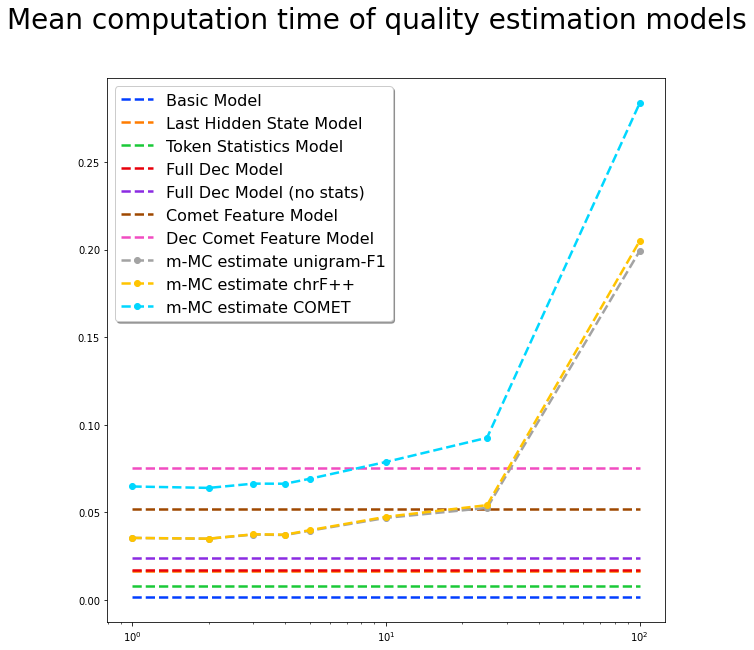

In [12]:
### Create a figure for utilities
import itertools


fig, (ax) = plt.subplots(1, figsize=(10,10))





names = [PRETTY_NAMES[name] for name in models]


### HERE we gather the statistics


# results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])

# Get the results for the basic ref model


#### HERE we show the results
color_palette = itertools.cycle(sns.color_palette('bright'))
plt.rcParams.update({'font.size': 16})

lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

lw=2.5

time_models = [timing_models[model] for model in models]
for line, name, stat in zip(lines, names, time_models):
    color = next(color_palette)
    ax.plot(ms, [stat] * 8, '--', label=name, color = color, lw=lw)
ax.set_xscale('log')

UTILITY_NAMES = {
    'unigram-f1': 'unigram-F1',
    'chrf': 'chrF++',
    'COMET': 'COMET',
}

for util in utilities:
    ax.plot(ms, mc_estimate_timing[util], '--o', label='m-MC estimate {}'.format(UTILITY_NAMES[util]), lw=lw, color=next(color_palette))
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend( shadow=True, ncol=1)
fig.suptitle("Mean computation time of quality estimation models" , fontsize=28)
plt.show()

In [17]:
# Compute the computation time of the basic reference models
basic_ref_models_timing =  {}
for util in utilities:
    basic_ref_models_timing[util] = [ timing_models["full_dec_model"] +  mc_estimate_timing[util][i] for i in range(len(ms)) ]


[0.0014542001058545232,
 0.016235920916361193,
 0.008109933413398124,
 0.017101969971011426,
 0.02382522225874862,
 0.051896765857002855,
 0.0755451023826103]

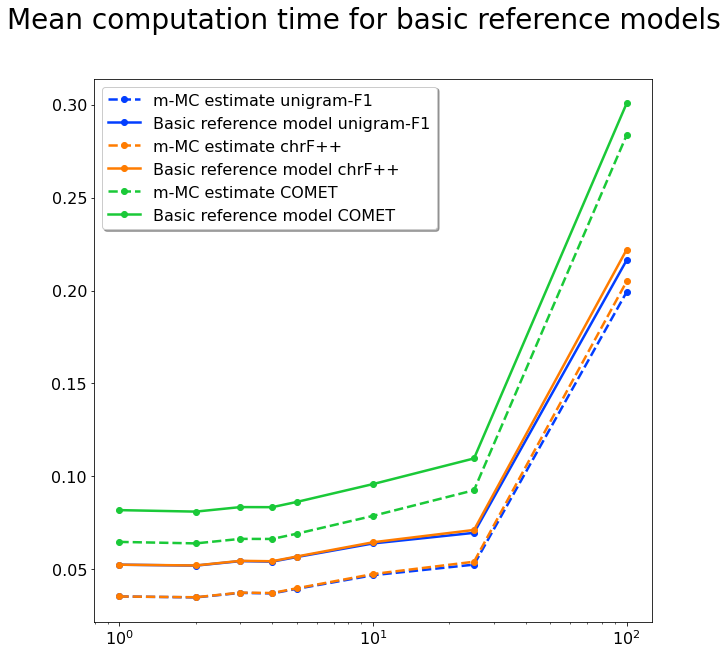

In [23]:
### Create a figure for utilities
import itertools


fig, (ax) = plt.subplots(1, figsize=(10,10))





names = [PRETTY_NAMES[name] for name in models]


### HERE we gather the statistics


# results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])

# Get the results for the basic ref model


#### HERE we show the results
color_palette = itertools.cycle(sns.color_palette('bright'))
plt.rcParams.update({'font.size': 16})


ax.set_xscale('log')

UTILITY_NAMES = {
    'unigram-f1': 'unigram-F1',
    'chrf': 'chrF++',
    'COMET': 'COMET',
}

for util in utilities:
    color = next(color_palette)
    ax.plot(ms, mc_estimate_timing[util], '--o', label='m-MC estimate {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)
    ax.plot(ms, basic_ref_models_timing[util], '-o', label='Basic reference model {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)

    
    
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend( shadow=True, ncol=1)
fig.suptitle("Mean computation time for basic reference models" , fontsize=28)
plt.show()